<a href="https://colab.research.google.com/github/Merostoroloji/VC/blob/main/16_12_2023_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

In [ ]:
house =  pd.read_csv("house.csv", index_col = 0)
house.shape

(1460, 80)

In [ ]:
house.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [ ]:
house.MSSubClass = house.MSSubClass.astype("str")
house.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [ ]:
house.isnull().sum().sum()

6965

In [ ]:
missPercent = house.isnull().mean()
missPercent

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [ ]:
drop_cols = list(missPercent[missPercent > 0.1].index)
drop_cols

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
df_drop_cols = house.drop(drop_cols, axis = 1)
df_drop_cols.shape

(1460, 74)

In [ ]:
df_drop_cols.isnull().sum().sum()

609

In [ ]:
df_without_na = df_drop_cols.dropna()
df_without_na.shape

(1338, 74)

In [ ]:
df_without_na_dummy = pd.get_dummies(df_without_na, drop_first = True)
df_without_na_dummy.shape

(1338, 240)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_without_na_dummy.drop("SalePrice", axis = 1)
y = df_without_na["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mdl = LinearRegression()
scores = cross_val_score(mdl, X_train, y_train, cv = 10)

mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)
r2 = r2_score(y_test, ypred)

result = pd.DataFrame([], columns = ["r2_mean", "r2_std", "r2_test"])
result.loc["Without NA"] = [scores.mean(), scores.std(), r2]
result

,r2_mean,r2_std,r2_test
Without NA,0.547436,0.574908,0.380075


In [ ]:
miss_percent = df_drop_cols.isnull().mean()
miss_percent[miss_percent > 0]

MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [ ]:
df_drop_cols.MasVnrType = df_drop_cols.MasVnrType.fillna("None")
df_drop_cols.MasVnrArea = df_drop_cols.MasVnrArea.fillna(0)
df_drop_cols.BsmtQual = df_drop_cols.BsmtQual.fillna("None")
df_drop_cols.BsmtCond = df_drop_cols.BsmtCond.fillna("None")
df_drop_cols.BsmtExposure = df_drop_cols.BsmtExposure.fillna("None")
df_drop_cols.BsmtFinType1 = df_drop_cols.BsmtFinType1.fillna("None")
df_drop_cols.BsmtFinType2 = df_drop_cols.BsmtFinType2.fillna("None")
df_drop_cols.Electrical = df_drop_cols.Electrical.fillna("None")
df_drop_cols.GarageType = df_drop_cols.GarageType.fillna("None")
df_drop_cols.GarageYrBlt = df_drop_cols.GarageYrBlt.fillna(0)
df_drop_cols.GarageFinish = df_drop_cols.GarageFinish.fillna("None")
df_drop_cols.GarageQual = df_drop_cols.GarageQual.fillna("None")
df_drop_cols.GarageCond = df_drop_cols.GarageCond.fillna("None")

In [ ]:
df_drop_cols_dummy = pd.get_dummies(df_drop_cols, drop_first = True)
print(df_drop_cols_dummy.shape)

X = df_drop_cols_dummy.drop("SalePrice", axis = 1)
y = df_drop_cols_dummy["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mdl = LinearRegression()
scores = cross_val_score(mdl, X_train, y_train, cv = 10)

mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)
r2 = r2_score(y_test, ypred)

result.loc["Fill NA"] = [scores.mean(), scores.std(), r2]
result

(1460, 255)


,r2_mean,r2_std,r2_test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133


In [ ]:
df_drop_cols["LotFrontage"] = house.LotFrontage.fillna(0)
df_drop_cols["Alley"] = house.Alley.fillna("None")
df_drop_cols["FireplaceQu"] = house.FireplaceQu.fillna("None")
df_drop_cols["PoolQC"] = house.PoolQC.fillna("None")
df_drop_cols["Fence"] = house.Fence.fillna("None")
df_drop_cols["MiscFeature"] = house.MiscFeature.fillna("None")
print(df_drop_cols.shape)

(1460, 80)


In [ ]:
df_drop_cols_dummy = pd.get_dummies(df_drop_cols, drop_first = True)
print(df_drop_cols_dummy.shape)

X = df_drop_cols_dummy.drop("SalePrice", axis = 1)
y = df_drop_cols_dummy["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mdl = LinearRegression()
scores = cross_val_score(mdl, X_train, y_train, cv = 10)

mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)
r2 = r2_score(y_test, ypred)

result.loc["Full Data"] = [scores.mean(), scores.std(), r2]
result

(1460, 274)


,r2_mean,r2_std,r2_test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897


In [ ]:
df_new = df_drop_cols.copy()
df_new.MSSubClass.unique()

array(['60', '20', '70', '50', '190', '45', '90', '120', '30', '85', '80',
       '160', '75', '180', '40'], dtype=object)

In [ ]:
df_new.MSSubClass.value_counts()/len(df_new)

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

In [ ]:
category_percent = df_new.MSSubClass.value_counts()/len(df_new)
category = list(category_percent[category_percent < 0.01].index)
category

['45', '180', '40']

In [ ]:
df_new.MSSubClass = df_new.MSSubClass.replace(category, "Other")
df_new.MSSubClass.value_counts()/len(df_new)

20       0.367123
60       0.204795
50       0.098630
120      0.059589
30       0.047260
160      0.043151
70       0.041096
80       0.039726
90       0.035616
190      0.020548
Other    0.017808
85       0.013699
75       0.010959
Name: MSSubClass, dtype: float64

In [ ]:
df_new_dummy = pd.get_dummies(df_new, drop_first = True)
print(df_new_dummy.shape)

X = df_new_dummy.drop("SalePrice", axis = 1)
y = df_new_dummy["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mdl = LinearRegression()
scores = cross_val_score(mdl, X_train, y_train, cv = 10)

mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)
r2 = r2_score(y_test, ypred)

result.loc["MSSubClass Simple"] = [scores.mean(), scores.std(), r2]
result

(1460, 272)


,r2_mean,r2_std,r2_test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499


In [ ]:
category_cols = [col for col in df_new.columns if df_new[col].dtype == "O"]
category_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'Alley',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
for col in category_cols:
    category_percent = df_new[col].value_counts()/len(df_new)
    category = list(category_percent[category_percent < 0.01].index)
    if len(category) > 1:
        df_new[col] = df_new[col].replace(category, "Other")

In [ ]:
df_new_dummy = pd.get_dummies(df_new, drop_first = True)
print(df_new_dummy.shape)

X = df_new_dummy.drop("SalePrice", axis = 1)
y = df_new_dummy["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mdl = LinearRegression()
scores = cross_val_score(mdl, X_train, y_train, cv = 10)

mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)
r2 = r2_score(y_test, ypred)

result.loc["All Category Simple"] = [scores.mean(), scores.std(), r2]
result

(1460, 217)


,r2_mean,r2_std,r2_test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965


In [ ]:
df_new.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [ ]:
df_new.ExterQual = df_new.ExterQual.replace({"Fa":1, "TA":2, "Gd":3, "Ex":4})
df_new.ExterQual.unique()

array([3, 2, 4, 1])

In [ ]:
df_new_dummy = pd.get_dummies(df_new, drop_first = True)
print(df_new_dummy.shape)

X = df_new_dummy.drop("SalePrice", axis = 1)
y = df_new_dummy["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

mdl = LinearRegression()
scores = cross_val_score(mdl, X_train, y_train, cv = 10)

mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)
r2 = r2_score(y_test, ypred)

result.loc["ExterQual Ordinal"] = [scores.mean(), scores.std(), r2]
result

(1460, 215)


,r2_mean,r2_std,r2_test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884


In [ ]:
mdl.fit(X_train, y_train)
ypred = mdl.predict(X_train)
r2 = r2_score(y_train, ypred)
r2

0.9012732341290391

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.01)

selector.fit(X_train)

X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print(X_train_new.shape)

scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

mdl.fit(X_train_new, y_train)
ypred = mdl.predict(X_test_new)
r2 = r2_score(y_test, ypred)

result.loc["Variance Threshold"] = [scores.mean(), scores.std(), r2]
result

(1168, 196)


,r2_mean,r2_std,r2_test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, r_regression, mutual_info_regression

selector = SelectKBest(mutual_info_regression, k = "all")

selector.fit(X_train, y_train)

f_scores = pd.Series(np.abs(selector.scores_), index = X_train.columns)
f_scores = f_scores.sort_values(ascending = False)
f_scores

OverallQual         0.523675
GrLivArea           0.453560
GarageArea          0.363915
GarageCars          0.359818
TotalBsmtSF         0.345647
                      ...   
Electrical_Other    0.000000
MSSubClass_75       0.000000
MSSubClass_70       0.000000
Functional_Other    0.000000
MiscFeature_Shed    0.000000
Length: 214, dtype: float64

In [ ]:
k = 144
best_cols = f_scores[:k].index

X_train_new = X_train[best_cols]
X_test_new = X_test[best_cols]
print(X_train_new.shape)

scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

mdl.fit(X_train_new, y_train)
ypred = mdl.predict(X_test_new)
r2 = r2_score(y_test, ypred)

result.loc["Select KBest"] = [scores.mean(), scores.std(), r2]
result

(1168, 144)


,r2_mean,r2_std,r2_test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Select KBest,0.822132,0.113247,0.873332
RFE,0.803279,0.131019,0.861767


In [ ]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
    best_cols = f_scores[:k].index
    X_train_new = X_train[best_cols]
    scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)
    if scores.mean() > best_r2:
        best_r2 = scores.mean()
        best_k = k

print(best_k)

144


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

selector = RFE(DecisionTreeRegressor(random_state = 42), n_features_to_select=1, step = 1)

selector.fit(X_train, y_train)
ranks = pd.Series(selector.ranking_, index = X_train.columns)
ranks = ranks.sort_values()
ranks

OverallQual               1
GrLivArea                 2
TotalBsmtSF               3
YearBuilt                 4
LotArea                   5
                       ... 
Neighborhood_ClearCr    210
BsmtFinType2_BLQ        211
BsmtFinType2_Rec        212
Exterior2nd_Stucco      213
Neighborhood_SWISU      214
Length: 214, dtype: int64

In [ ]:
k = 119
best_cols = ranks[:k].index

X_train_new = X_train[best_cols]
X_test_new = X_test[best_cols]
print(X_train_new.shape)

scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

mdl.fit(X_train_new, y_train)
ypred = mdl.predict(X_test_new)
r2 = r2_score(y_test, ypred)

result.loc["RFE"] = [scores.mean(), scores.std(), r2]
result

(1168, 119)


,r2_mean,r2_std,r2_test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Select KBest,0.822132,0.113247,0.873332
RFE,0.805484,0.125609,0.865764


In [ ]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
    best_cols = ranks[:k].index
    X_train_new = X_train[best_cols]
    scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)
    if scores.mean() > best_r2:
        best_r2 = scores.mean()
        best_k = k

print(best_k)

119


In [ ]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(DecisionTreeRegressor(random_state = 42),
                           threshold = -np.inf, max_features=100)

selector.fit(X_train, y_train)

X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)

print(X_train_new.shape)

scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

mdl.fit(X_train_new, y_train)
ypred = mdl.predict(X_test_new)
r2 = r2_score(y_test, ypred)

result.loc["Select From Model"] = [scores.mean(), scores.std(), r2]
result


(1168, 100)


,r2_mean,r2_std,r2_test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Select KBest,0.822132,0.113247,0.873332
RFE,0.805484,0.125609,0.865764
Select From Model,0.808237,0.130546,0.860283


In [ ]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
    selector = SelectFromModel(DecisionTreeRegressor(random_state = 42),
                           threshold = -np.inf, max_features=k)
    selector.fit(X_train, y_train)
    X_train_new = selector.transform(X_train)
    scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)
    if scores.mean() > best_r2:
        best_r2 = scores.mean()
        best_k = k

print(best_k)

100


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_train)

X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

print(X_train_new.shape)

scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)

mdl.fit(X_train_new, y_train)
ypred = mdl.predict(X_test_new)
r2 = r2_score(y_test, ypred)

result.loc["PCA"] = [scores.mean(), scores.std(), r2]
result

(1168, 2)


,r2_mean,r2_std,r2_test
Without NA,0.547436,0.574908,0.380075
Fill NA,0.588745,0.419368,0.643133
Full Data,0.123984,0.756375,-0.115897
MSSubClass Simple,0.129578,0.752395,-0.110499
All Category Simple,0.750350,0.177566,0.869965
ExterQual Ordinal,0.752284,0.173773,0.868884
Variance Threshold,0.806228,0.133860,0.868697
Select KBest,0.822132,0.113247,0.873332
RFE,0.805484,0.125609,0.865764
Select From Model,0.808237,0.130546,0.860283


In [ ]:
best_r2 = -np.inf

for k in range(2, X_train.shape[1]):
    pca = PCA(n_components=k)
    pca.fit(X_train)
    X_train_new = pca.transform(X_train)
    scores = cross_val_score(mdl, X_train_new, y_train, cv = 10)
    if scores.mean() > best_r2:
        best_r2 = scores.mean()
        best_k = k

print(best_k)

2


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
train, test = train_test_split(df_new[category_cols], test_size = 0.2, random_state = 42)


encoder = OneHotEncoder()
encoder.fit(train)

X_train_new = encoder.transform(train)
X_test_new = encoder.transform(test)

print(X_train_new.shape)
print(X_test_new.shape)
X_test_new

(1168, 225)
(292, 225)


<292x225 sparse matrix of type '<class 'numpy.float64'>'
	with 12848 stored elements in Compressed Sparse Row format>

In [ ]:
house =  pd.read_csv("house.csv", index_col = 0)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

imputer.fit(house[cat_cols])
imputer.transform(house[cat_cols])

array([['RL', 'Pave', 'Grvl', ..., 'Shed', 'WD', 'Normal'],
       ['RL', 'Pave', 'Grvl', ..., 'Shed', 'WD', 'Normal'],
       ['RL', 'Pave', 'Grvl', ..., 'Shed', 'WD', 'Normal'],
       ...,
       ['RL', 'Pave', 'Grvl', ..., 'Shed', 'WD', 'Normal'],
       ['RL', 'Pave', 'Grvl', ..., 'Shed', 'WD', 'Normal'],
       ['RL', 'Pave', 'Grvl', ..., 'Shed', 'WD', 'Normal']], dtype=object)

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

imputer.fit(house[num_cols])
imputer.transform(house[num_cols])

array([[6.00000e+01, 6.50000e+01, 8.45000e+03, ..., 2.00000e+00,
        2.00800e+03, 2.08500e+05],
       [2.00000e+01, 8.00000e+01, 9.60000e+03, ..., 5.00000e+00,
        2.00700e+03, 1.81500e+05],
       [6.00000e+01, 6.80000e+01, 1.12500e+04, ..., 9.00000e+00,
        2.00800e+03, 2.23500e+05],
       ...,
       [7.00000e+01, 6.60000e+01, 9.04200e+03, ..., 5.00000e+00,
        2.01000e+03, 2.66500e+05],
       [2.00000e+01, 6.80000e+01, 9.71700e+03, ..., 4.00000e+00,
        2.01000e+03, 1.42125e+05],
       [2.00000e+01, 7.50000e+01, 9.93700e+03, ..., 6.00000e+00,
        2.00800e+03, 1.47500e+05]])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
imputer.fit(house[num_cols])
imputer.transform(house[num_cols])

In [ ]:
X  = house.drop("SalePrice", axis = 1)
y  = house["SalePrice"]
cat_cols = [col for col in X.columns if X[col].dtype == "O"]
num_cols = [col for col in X.columns if X[col].dtype != "O"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.pipeline import Pipeline

num_preprocess = Pipeline([
    ("impute", IterativeImputer()),
    ("scale", StandardScaler())
])

num_preprocess.fit(X_train[num_cols])
num_preprocess.transform(X_test[num_cols])

In [ ]:
cat_preprocess = Pipeline([
    ("impute", SimpleImputer(strategy = "most_frequent")),
    ("encode", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

cat_preprocess.fit(X_train[cat_cols])
cat_preprocess.transform(X_test[cat_cols])

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso

preprocess = ColumnTransformer([
    ("cat_preprocess", cat_preprocess, cat_cols),
    ("num_preprocess", num_preprocess, num_cols)
])

ml_pipe = Pipeline([
    ("preprocess", preprocess),
    ("selection", SelectKBest(mutual_info_regression, k = 150)),
    ("model", Lasso(alpha = 0.1))
])
ml_pipe.fit(X_train, y_train)

ypred = ml_pipe.predict(X_test)
r2_score(y_test,ypred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.395e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


0.869698127698506

In [ ]:
from sklearn.model_selection import GridSearchCV

ml_pipe = Pipeline([
    ("preprocess", preprocess),
    ("selection", SelectKBest(mutual_info_regression)),
    ("model", Lasso())
])

params = {"selection__k" : np.arange(100,160,10),
          "model__alpha" : [0.1,1,10,50,100]}

grid_search = GridSearchCV(ml_pipe, params, cv = 5, verbose = 1, n_jobs = -1)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

{'model__alpha': 50, 'selection__k': 150}

In [ ]:
best_mdl = grid_search.best_estimator_
best_mdl.fit(X_train, y_train)

ypred = best_mdl.predict(X_test)
r2_score(y_test,ypred)

0.8742038613796241

In [ ]:
x = np.random.randn(100)
y = 2*x + np.random.randn(x.size)
plt.plot(x,y, "*")

(-6.319912760737708,
 6.7589365976478355,
 -1.1656077487567262,
 11.913241609628818)

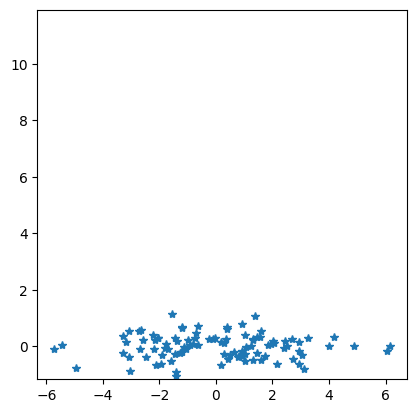

In [ ]:
X = np.c_[x,y]
pca = PCA()
pca.fit(X)
X_new = pca.transform(X)

plt.plot(X_new[:,0],X_new[:,1], "*")
plt.axis("square")